# Data Modeling with Logistic Regression model

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from category_encoders import WOEEncoder, TargetEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import PolynomialFeatures as Poly

from mlxtend.evaluate import feature_importance_permutation

from mlxtend.feature_extraction import PrincipalComponentAnalysis
from mlxtend.preprocessing import standardize

from mlxtend.feature_extraction import RBFKernelPCA as KPCA
from pyearth import Earth

from mlxtend.plotting import plot_pca_correlation_graph

# from umap import UMAP

import warnings
warnings.filterwarnings("ignore")

In [2]:
def stringify(data):
    if type(data) != pd.core.frame.DataFrame:
        X = pd.DataFrame(data)
    else:
        X = data
        
    for c in X.columns.tolist():
        X[c] = X[c].astype(str)
#     X = X.applymap(str)
    return X

objectify = FunctionTransformer(func = stringify, check_inverse = False, validate=False)
binner = KBinsDiscretizer(n_bins = 10, encode = 'ordinal')
poly = Poly(degree=3)
encoder = WOEEncoder()

In [3]:
df = pd.read_csv('/Users/davidwalkup/ds-course/projects/Mod3/Seattle_Terry_Stops/data/Terry_Stops_added_features.csv')

In [4]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat',
       'subject_age_groups', 'stop_resolution', 'arrest_flag',
       'weapon_present', 'officer_gender', 'officer_race', 'subject_race',
       'subject_gender'],
      dtype='object')

In [6]:
target = 'arrest_flag'

In [7]:
excluded_cols = ['arrest_flag', 'Arrest Flag', 'stop_resolution', 'Stop Resolution', 'Subject ID']

# used_cols = [c for c in df.columns if (c not in [target, 'stop_resolution'] and '_' in c)]
# used_cols = [c for c in df.columns if c not in excluded_cols]

used_cols = ['Officer Gender', 'Reported Time', 'weapon_present', 'Initial Call Type']
X = df[used_cols]
y = df[target]

clf = LogisticRegression(class_weight='balanced')

scorecard = make_pipeline(objectify, encoder, poly, clf)

scores = cross_val_score(scorecard, X.values, y.values, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.8597557865754016 +/- 0.007328641075193442


* scorecard, no poly = 0.7316332047925206 +/- 0.016245739477284915
* 2 degrees = 0.8392500438013089 +/- 0.019636147953002545
* 3 degrees = 0.8597557865754016 +/- 0.007328641075193442
* 4 degrees = 0.8726112180444696 +/- 0.01681182446652548

In [14]:
pd.DataFrame(Pipeline(scorecard.steps[:-1]).fit_transform(X.values, y.values))

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,-0.021253,0.231792,-0.038832,-2.229887,0.000452,-0.004926,0.000825,0.047392,0.053728,...,0.012454,-0.002086,-0.119807,0.000350,0.020071,1.152564,-0.000059,-0.003362,-0.193086,-11.087886
1,1.0,-0.021253,0.432463,-0.038832,-2.229887,0.000452,-0.009191,0.000825,0.047392,0.187024,...,0.080881,-0.007262,-0.417043,0.000652,0.037447,2.150379,-0.000059,-0.003362,-0.193086,-11.087886
2,1.0,-0.021253,-0.260684,-0.038832,-2.229887,0.000452,0.005540,0.000825,0.047392,0.067956,...,-0.017715,-0.002639,-0.151535,-0.000393,-0.022573,-1.296225,-0.000059,-0.003362,-0.193086,-11.087886
3,1.0,-0.021253,-0.340727,-0.038832,-2.229887,0.000452,0.007242,0.000825,0.047392,0.116095,...,-0.039557,-0.004508,-0.258878,-0.000514,-0.029504,-1.694229,-0.000059,-0.003362,-0.193086,-11.087886
4,1.0,-0.021253,-0.203526,-0.038832,-2.229887,0.000452,0.004326,0.000825,0.047392,0.041423,...,-0.008431,-0.001609,-0.092368,-0.000307,-0.017623,-1.012010,-0.000059,-0.003362,-0.193086,-11.087886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39392,1.0,-0.021253,0.000000,-0.038832,0.085189,0.000452,-0.000000,0.000825,-0.001811,0.000000,...,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000059,0.000128,-0.000282,0.000618
39393,1.0,-0.021253,0.000000,-0.038832,0.553724,0.000452,-0.000000,0.000825,-0.011768,0.000000,...,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000059,0.000835,-0.011906,0.169778
39394,1.0,-0.021253,0.000000,-0.038832,-2.229887,0.000452,-0.000000,0.000825,0.047392,0.000000,...,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000059,-0.003362,-0.193086,-11.087886
39395,1.0,-0.021253,2.224223,-0.038832,0.842052,0.000452,-0.047272,0.000825,-0.017896,4.947166,...,11.003599,-0.192106,4.165771,0.003354,-0.072728,1.577089,-0.000059,0.001270,-0.027534,0.597058


In [8]:
for i, col in enumerate(used_cols):
    print(i, ":", col)

0 : Officer Gender
1 : Reported Time
2 : weapon_present
3 : Initial Call Type


[ 0.00050761  0.0142132   0.0001269  -0.00444162]


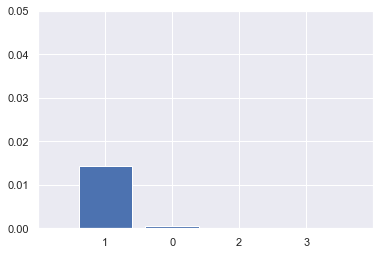

In [9]:
from mlxtend.evaluate import feature_importance_permutation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    test_size=.20, random_state=42, 
                                                    stratify=y.values)

scorecard.fit(X_train, y_train)
imp_vals, _ = feature_importance_permutation(
    predict_method=scorecard.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=1,
    seed=1)

print(imp_vals)

indices = np.argsort(imp_vals)[::-1]
plt.figure()
plt.bar(range(X.shape[1]), imp_vals[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.05])
plt.show()

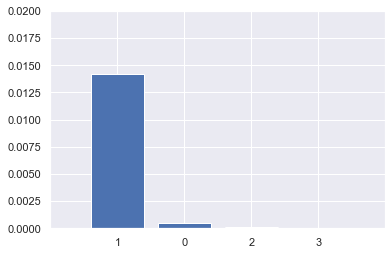

In [10]:
indices = np.argsort(imp_vals)[::-1]
plt.figure()
plt.bar(range(X.shape[1]), imp_vals[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.02])
plt.show()